# 자동차 평가 데이터 분류 문제 ( 딥러닝 )

## import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

## 데이터 전처리 및 스케일링

In [17]:
df = pd.read_csv("C:/Users/plo55/car_evaluation.csv", header=None) # index_col = 0..?, # CSV 파일의 첫 번째 행(header)을 컬럼 이름으로 사용하지 않음
# 파일에 헤더(컬럼 이름)가 없는 상태에서 header=None을 생략하면, 첫 번째 행이 컬럼 이름으로 사용됨(원래 데이터인데 헤더로 변함!).
# 그래서 컬럼명을 직접 설정하려면 header=None을 넣어야 함!
# index_col=0이면 첫 번째 열을 인덱스로 지정한다는 뜻이다. 하지만 car_evaluation.csv는 첫 번째 열이 데이터 값이므로 index_col=0을 사용하지 않는 게 맞다.
print(df.head())
print("\n=====================================================\n")

df.columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output'] # 각 컬럼명을 직접 지정
# price: 가격, maint: 유지비, doors: 문 개수, persons: 수용 인원, lug_capacity: 트렁크 크기, safety: 안전성, output: 자동차 평가 결과 (label)
print(df.columns) # 컬럼 확인 # print(df['output']) 특정 컬럼 확인
print("\n=====================================================\n")

# 결측치 확인
print(df.isnull().sum())
print("\n=====================================================\n")

# 레이블 불균형 여부를 위한 갯수 확인 (숫자)
print(df['output'].value_counts())
print("\n=====================================================\n")
# output 불균형이 심한 것을 확인할 수 있다.
# unacc    1210
# acc       384
# good       69
# vgood      65
# 이 경우 SMOTE를 이용해서 데이터를 증강하는 방법을 사용할 수 있다. 데이터가 적은 good과 vgood 클래스를 인위적으로 늘려서 학습을 해결하는 것.

# X와 Y 분할
X = df.drop('output', axis=1) # Feature
Y = df['output'] # Label

# One-Hot Encoding하면서 Numpy으로 변환
X = pd.get_dummies(X).values # Feature도 문자열 데이터이므로 인코딩.
Y = pd.get_dummies(Y).values # label은 숫자 데이터여도 연관성을 끊어줘야 하기 때문에 반드시 인코딩.
print(X)
print(Y)

# 학습 데이터 & 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 분할된 데이터의 shape을 출력
print("\n=====================================================\n")
print("X_train.shape : ", X_train.shape) # (1382, 21) : 특성의 개수 21개
print("X_test.shape : ", X_test.shape)
print("Y_train.shape : ", Y_train.shape)
print("Y_test.shape : ", Y_test.shape)

       0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc


Index(['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety',
       'output'],
      dtype='object')


price           0
maint           0
doors           0
persons         0
lug_capacity    0
safety          0
output          0
dtype: int64


output
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


[[False False False ... False  True False]
 [False False False ... False False  True]
 [False False False ...  True False False]
 ...
 [False  True False ... False  True False]
 [False  True False ... False False  True]
 [False  True False ...  True False False]]
[[False False  True False]
 [False False  True False]
 [False False  True False]
 ...
 [False False  True False]
 [False  True False Fals

## 딥러닝 학습 및 예측

In [20]:
# 딥러닝
model = Sequential()

model.add(Dense(20,input_shape=(21,),activation='relu')) # 입력층 : 특성의 개수 21개
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='softmax')) # 출력층 : 4진 분류이므로 뉴런 개수 4개, 그에 맞는 활성화 함수와 loss function 사용

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model.summary() # 모델 구조 출력


model_history=model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.1) # validation_data = (X_test, Y_test)으로 하면 안됨.
# 테스트 데이터는 테스트할 때만 사용해야 됨. 따라서 훈련 데이터의 10%를 검증 데이터로 사용.
Y_pred = model.predict(X_test) # 예측. 각 클래스에 대한 확률 값을 예측한다.

C:\Users\plo55\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 20)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,364 (5.33 KB)

 Trainable params: 1,364 (5.33 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6572 - loss: 1.0792 - val_accuracy: 0.6259 - val_loss: 0.9178
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7152 - loss: 0.7570 - val_accuracy: 0.6331 - val_loss: 0.7572
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7299 - loss: 0.6133 - val_accuracy: 0.6691 - val_loss: 0.6328
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7538 - loss: 0.5434 - val_accuracy: 0.7698 - val_loss: 0.5333
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8480 - loss: 0.3954 - val_accuracy: 0.8129 - val_loss: 0.4670
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8651 - loss: 0.3419 - val_accuracy: 0.8129 - val_loss: 0.4343
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8713 - loss: 0.3249 - val_accuracy: 0.8489 - val_loss: 0.3902
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8957 - loss: 0.2775 - val_accuracy: 0.8633 - val_loss:

## 딥러닝 성능 평가

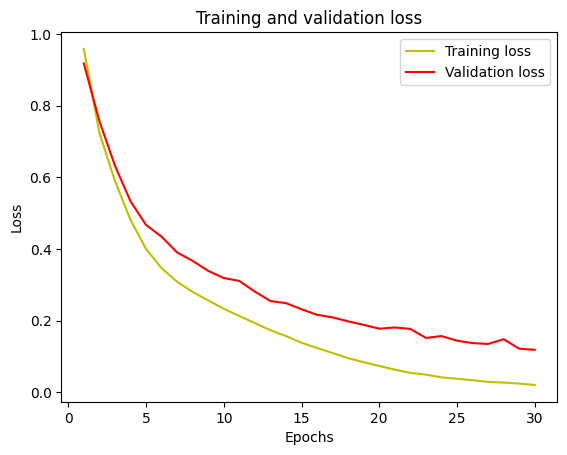

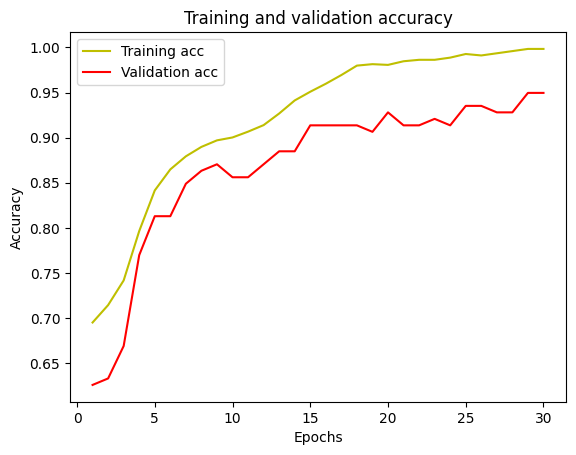



              precision    recall  f1-score   support

           0       0.96      0.93      0.94        83
           1       0.73      1.00      0.85        11
           2       0.99      1.00      0.99       235
           3       0.92      0.71      0.80        17

    accuracy                           0.97       346
   macro avg       0.90      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346



[[ 77   2   3   1]
 [  0  11   0   0]
 [  0   0 235   0]
 [  3   2   0  12]]


In [23]:
# 분류 문제에서 one-hot 인코딩된 데이터를 성능 평가에 쓰기 위해 다시 정수 라벨로 바꾸는 코드.
Y_test_class = np.argmax(Y_test,axis=1)
Y_pred_class = np.argmax(Y_pred,axis=1)

# 에폭마다 훈련 손실과 검증 손실이 어떻게 달라지는지 시각화
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 에폭마다 훈련 정확도와 검증 정확도가 어떻게 달라지는지 시각화
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 모델 성능 평가
print("\n=====================================================\n")
print(classification_report(Y_test_class, Y_pred_class))
print("\n=====================================================\n")
print(confusion_matrix(Y_test_class, Y_pred_class))